# Deep Learning A Z Mapa Auto organizáveis - Crédito

In [1]:
import minisom
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot
from minisom import MiniSom

In [27]:
base = pd.read_csv('credit_data.csv') # possui cliente, renda, idade, divida e se pagou ou não
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [28]:
base.isna().sum()
base = base.dropna()
base.loc[base['age'] < 0] 
base['age'].mean()
base.loc[base['age'] > 0].mean()
base.loc[base.age < 0, 'age'] = 40.92
base.loc[base['age'] < 0]
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values
normalizador =  MinMaxScaler(feature_range=(0,1))
x = normalizador.fit_transform(X)

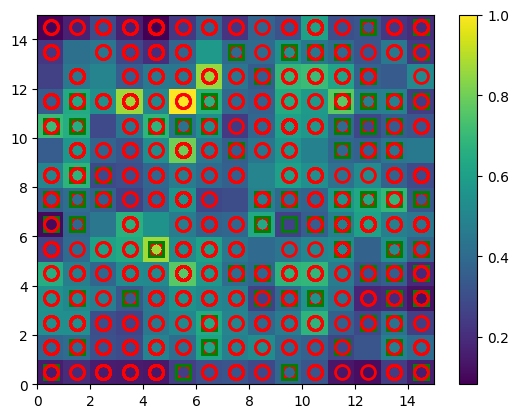

In [29]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration=300)
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[i])],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = colors[y[i]], markeredgewidth = 2)

In [5]:
mapeamento = som.win_map(X)
mapeamento

defaultdict(list,
            {(11,
              11): [array([1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03]), array([9.10000000e+01, 6.42758349e+04, 6.14409130e+01, 7.52003205e+03]), array([2.29000000e+02, 6.47809385e+04, 2.02281012e+01, 8.40241559e+03]), array([2.30000000e+02, 6.55884034e+04, 2.29182123e+01, 7.87973814e+03]), array([2.31000000e+02, 6.57437037e+04, 5.23005041e+01, 7.72457141e+03]), array([4.20000000e+02, 6.49402411e+04, 4.39410412e+01, 8.19693073e+03]), array([7.77000000e+02, 6.54514965e+04, 6.02763893e+01, 8.12904893e+03]), array([9.45000000e+02, 6.62550295e+04, 2.89600249e+01, 7.47521228e+03]), array([1.38600000e+03, 6.36606488e+04, 5.02829601e+01, 7.83257241e+03])],
             (10,
              6): [array([2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03]), array([7.30000000e+01, 3.37045085e+04, 3.31831062e+01, 5.89800089e+03]), array([1.65000000e+02, 3.34410511e+04, 2.78734862e+01, 5.28272856e+03]), array([2.72000000e+02, 3.35523

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from pandasgui import show

# Simulação da base (pois a original não foi fornecida)
# Colunas: ID, Age, Salary, Credit, Default (0 or 1)
base = pd.DataFrame(base)
print(base)

# Inserir alguns valores negativos para simular erros
base.loc[np.random.choice(base.index, 5), 'age'] = -1

# Limpeza dos dados
base = base.dropna()
base.loc[base['age'] < 0, 'age'] = base.loc[base['age'] > 0, 'age'].mean()

# Separação dos dados
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

# Normalização
normalizador = MinMaxScaler(feature_range=(0, 1))
X_normalizado = normalizador.fit_transform(X)

# Criação e treinamento do SOM
som = MiniSom(x=15, y=15, input_len=4, random_seed=0)
som.random_weights_init(X_normalizado)
som.train_random(data=X_normalizado, num_iteration=300)

# Mapeamento dos dados
mapeamento = som.win_map(X_normalizado)

# Exibir os dados do mapeamento de forma organizada
detalhes_mapeamento = []
for coordenada, lista in mapeamento.items():
    for vetor in lista:
        original = normalizador.inverse_transform([vetor])[0]
        detalhes_mapeamento.append({
            'Coordenada SOM': coordenada,
            'ID': int(round(original[0])),
            'Age': round(original[1], 2),
            'Salary': round(original[2], 2),
            'Credit': round(original[3], 2)
        })

df_mapeamento = pd.DataFrame(detalhes_mapeamento)
print(df_mapeamento.columns)

# 1. Lista das coordenadas SOM desejadas
coordenadas_desejadas = [(11, 5), (6, 13)]  # pode adicionar mais

# 2. Verifica se cada coordenada está no mapa e concatena os dados
vetores_suspeitos = np.concatenate(
    [mapeamento[coord] for coord in coordenadas_desejadas if coord in mapeamento],
    axis=0)

# 3. Inversão da normalização para os valores originais
suspeitos_original = normalizador.inverse_transform(vetores_suspeitos)

# 4. Cria o DataFrame com os nomes originais das colunas
colunas = ['clientid', 'income', 'age', 'loan']
df_suspeitos = pd.DataFrame(suspeitos_original, columns=colunas)

# 5. Arredonda o clientid para comparar com o original
df_suspeitos['clientid'] = df_suspeitos['clientid'].round().astype(int)

# 6. Junta com a coluna de classificação 'default' da base original
df_suspeitos = df_suspeitos.merge(base[['clientid', 'default']], on='clientid', how='left')

# 7. Ordena e exibe
df_suspeitos.sort_values(by='clientid', inplace=True)

# Resultado final
show(df_mapeamento, df_suspeitos)



      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]


PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Index(['Coordenada SOM', 'ID', 'Age', 'Salary', 'Credit'], dtype='object')


C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_16128\1650272226.py:77: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_16128\1650272226.py:77: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_16128\1650272226.py:77: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_16128\1650272226.py:77: FutureWarning:

Se

# Formas de visualizar os mapas:

### 1. U-Matrix (Unified Distance Matrix):

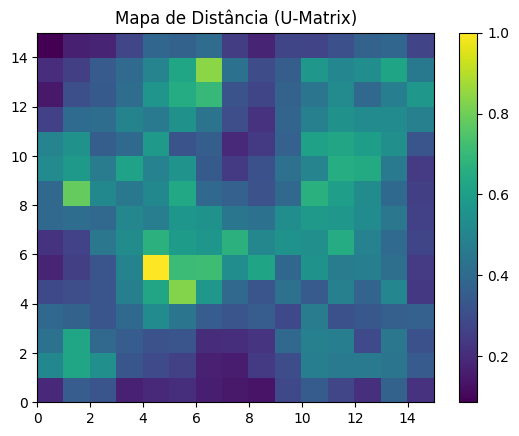

In [9]:
from pylab import pcolor, colorbar, show

pcolor(som.distance_map().T)  # matriz de distâncias transposta
colorbar()
plt.title("Mapa de Distância (U-Matrix)")
show()

### 2. Mapa de Ativação de Variáveis (Feature Maps):

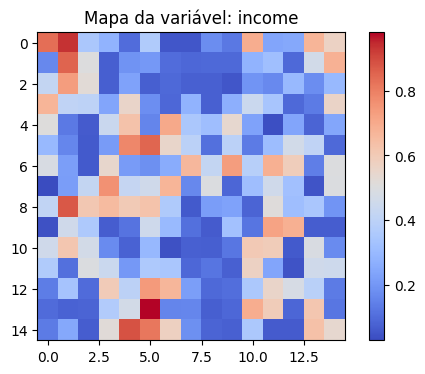

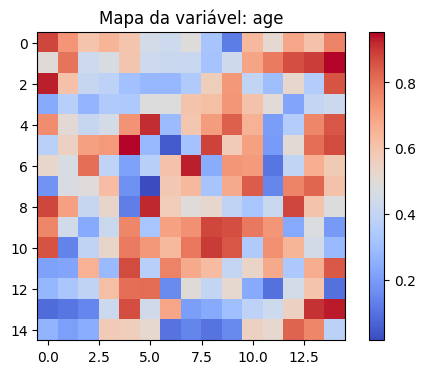

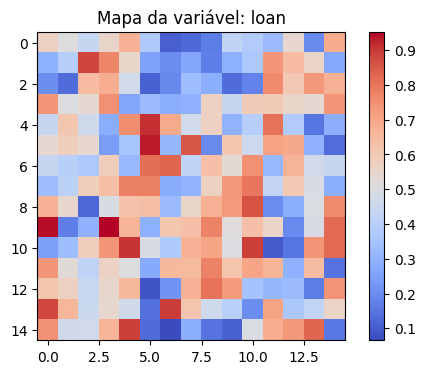

In [10]:
from pylab import bone, imshow

for i, col in enumerate(['income', 'age', 'loan']):
    plt.figure(figsize=(6, 4))
    imshow(som.get_weights()[:, :, i].T, cmap='coolwarm')  # Transposto para visualização correta
    plt.title(f"Mapa da variável: {col}")
    plt.colorbar()
    plt.show()

### 3. Mapa com Marcadores por Classe:

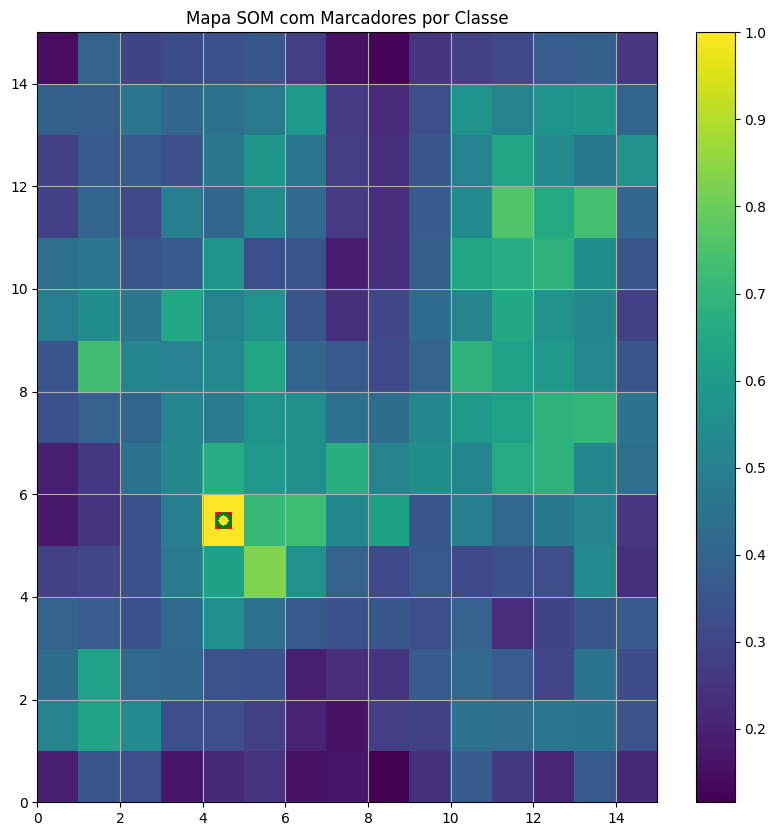

In [32]:
markers = ['o', 's']
colors = ['g', 'r']  # verde = não inadimplente, vermelho = inadimplente

plt.figure(figsize=(10, 10))
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[int(y[i])],
             markerfacecolor='None', markeredgecolor=colors[int(y[i])],
             markersize=10, markeredgewidth=2)
plt.title("Mapa SOM com Marcadores por Classe")
plt.grid()
plt.show()

### 4. Densidade de Ativação (quantos caíram em cada neurônio)

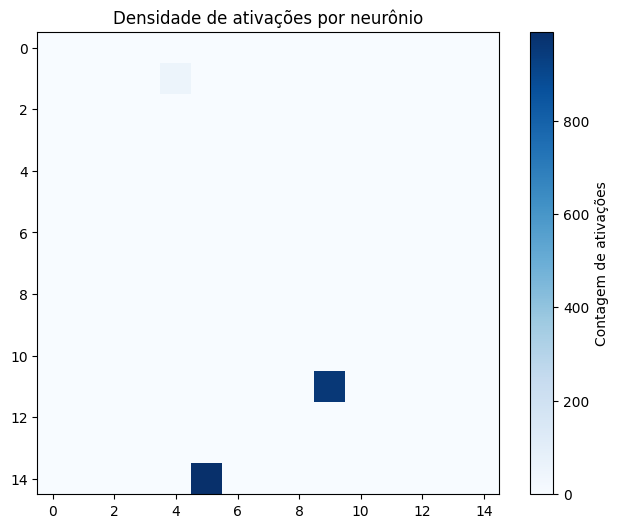

In [21]:
from collections import defaultdict

contagem = {}
for x in X:
    coord = som.winner(x)
    if coord in contagem:
        contagem[coord] += 1
    else:
        contagem[coord] = 1

mapa_densidade = np.zeros((15, 15))
for (i, j), count in contagem.items():
    mapa_densidade[i, j] = count

plt.figure(figsize=(8, 6))
plt.imshow(mapa_densidade.T, cmap='Blues')
plt.colorbar(label='Contagem de ativações')
plt.title('Densidade de ativações por neurônio')
plt.show()

### 5. Gráfico 3D do mapa de distância:

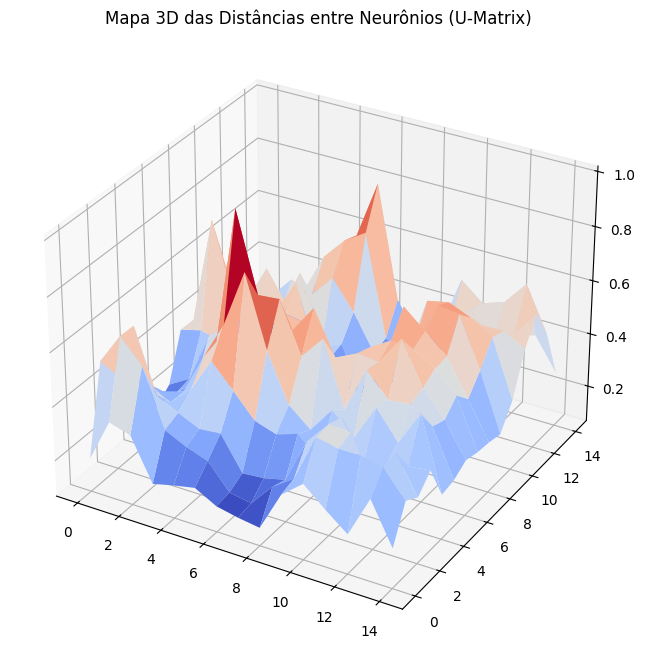

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
dist_map = som.distance_map().T

x = np.arange(dist_map.shape[0])
y = np.arange(dist_map.shape[1])
X_grid, Y_grid = np.meshgrid(x, y)

ax.plot_surface(X_grid, Y_grid, dist_map, cmap='coolwarm')
ax.set_title('Mapa 3D das Distâncias entre Neurônios (U-Matrix)')
plt.show()

### 6. Clusterização com KMeans sobre o SOM:

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\CLIENTE\anaconda3\envs\orlando\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\CLIENTE\anaconda3\envs\orlando\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\CLIENTE\anaconda3\envs\orlando\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePr

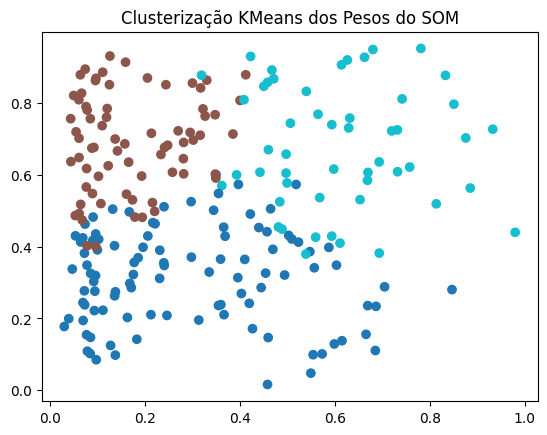

In [15]:
from sklearn.cluster import KMeans

pesos = som.get_weights().reshape(-1, X.shape[1])  # achata
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(pesos)

plt.scatter(pesos[:, 0], pesos[:, 1], c=labels, cmap='tab10')
plt.title("Clusterização KMeans dos Pesos do SOM")
plt.show()

### 8. Visualização Interativa com Plotly (heatmap):

In [17]:
import plotly.graph_objects as go

heatmap = som.distance_map().T
fig = go.Figure(data=go.Heatmap(z=heatmap, colorscale='Viridis'))
fig.update_layout(title="Mapa de Distância SOM (Plotly)", width=600, height=500)
fig.show()

### 9. Visualização com Anotações (IDs, clusters, etc):

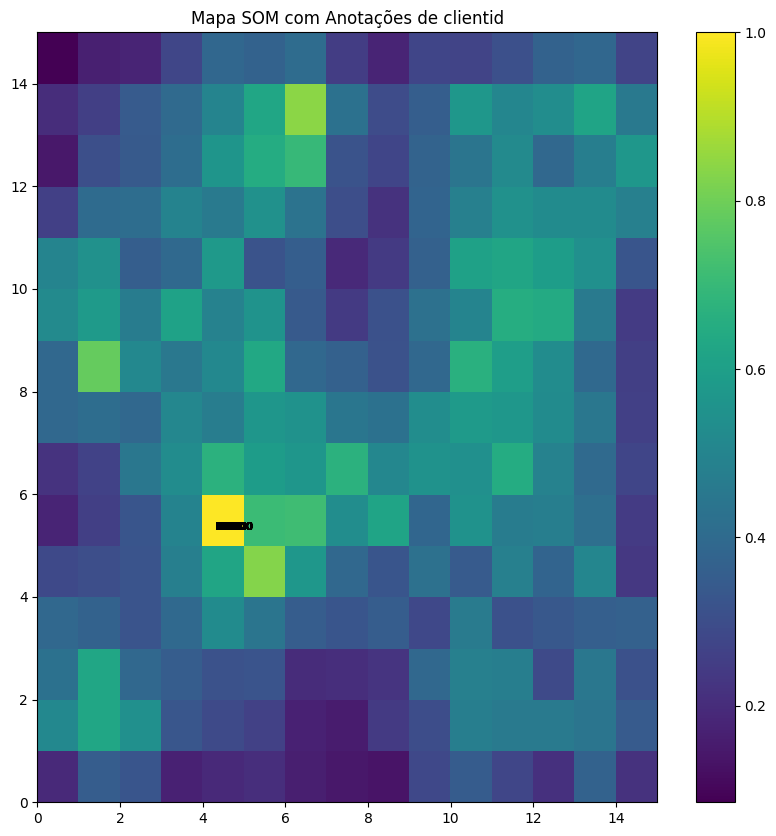

In [18]:
plt.figure(figsize=(10, 10))
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plt.text(w[0] + 0.3, w[1] + 0.3, str(base.iloc[i]['clientid']), fontsize=8, color='black')
plt.title("Mapa SOM com Anotações de clientid")
plt.show()

### 10. Visualização via PCA dos neurônios:

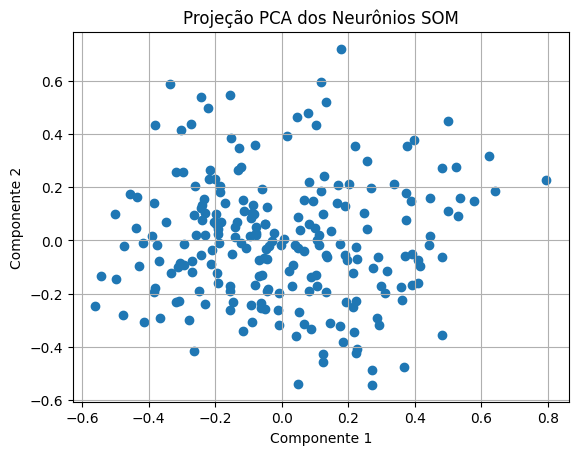

In [19]:
from sklearn.decomposition import PCA

pesos = som.get_weights().reshape(-1, X.shape[1])
pca = PCA(n_components=2)
proj = pca.fit_transform(pesos)

plt.scatter(proj[:, 0], proj[:, 1])
plt.title("Projeção PCA dos Neurônios SOM")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

interactive(children=(Dropdown(description='Variável:', options=('income', 'age', 'loan'), value='income'), Ou…

interactive(children=(IntSlider(value=3, description='Clusters', max=10, min=2), Output()), _dom_classes=('wid…

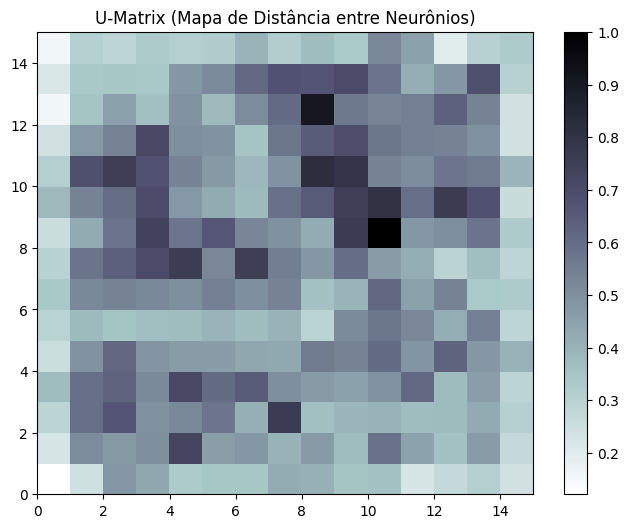

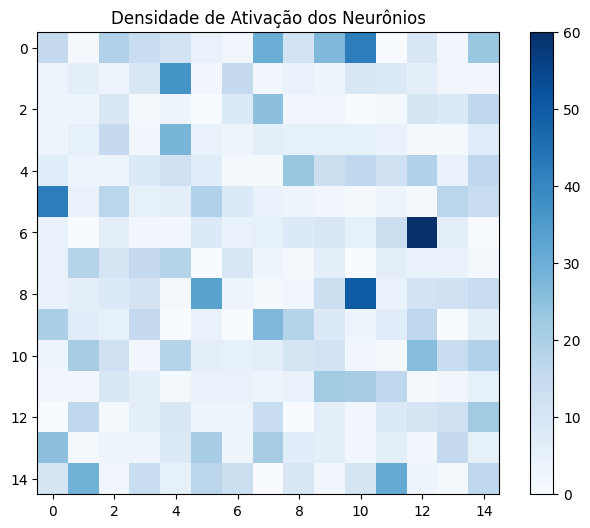

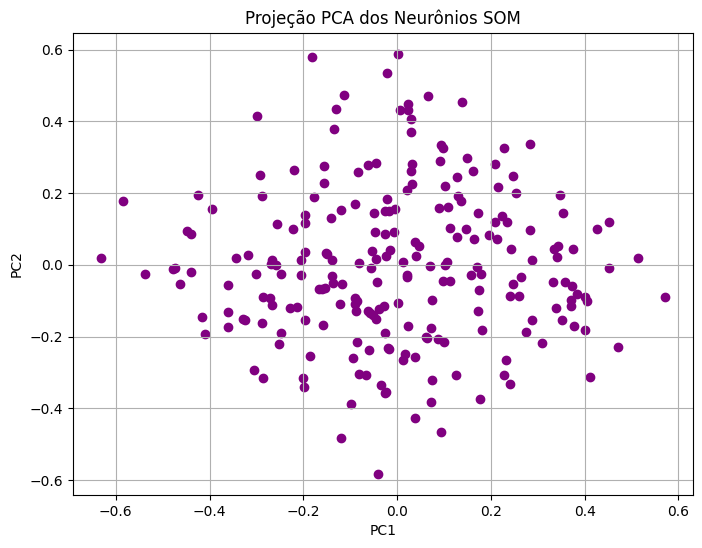

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from ipywidgets import interact, IntSlider, Dropdown
import ipywidgets as widgets

# --- Carregar dados simulados ou reais ---
base = pd.read_csv("credit_data.csv")  # ou substitua pelo seu caminho
base = base.dropna()
base.loc[base['age'] < 0, 'age'] = base[base['age'] > 0]['age'].mean()

X = base[['income', 'age', 'loan']].values
normalizador = MinMaxScaler(feature_range=(0, 1))
X_normalizado = normalizador.fit_transform(X)

# --- Inicializar SOM ---
som = MiniSom(x=15, y=15, input_len=3, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_normalizado)
som.train_random(data=X_normalizado, num_iteration=300)

# --- Dashboards interativos ---
def show_umatrix():
    plt.figure(figsize=(8, 6))
    plt.title("U-Matrix (Mapa de Distância entre Neurônios)")
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()
    plt.show()

def show_activation_density():
    from collections import defaultdict
    activation_map = defaultdict(int)
    for x in X_normalizado:
        activation_map[som.winner(x)] += 1
    density_map = np.zeros((15, 15))
    for (i, j), count in activation_map.items():
        density_map[i, j] = count
    plt.figure(figsize=(8, 6))
    plt.imshow(density_map.T, cmap='Blues')
    plt.colorbar()
    plt.title("Densidade de Ativação dos Neurônios")
    plt.show()

def show_feature_map(feature):
    i = {'income': 0, 'age': 1, 'loan': 2}[feature]
    heatmap = som.get_weights()[:, :, i]
    plt.figure(figsize=(6, 5))
    plt.imshow(heatmap.T, cmap='coolwarm')
    plt.title(f"Mapa de Ativação - {feature}")
    plt.colorbar()
    plt.show()

def show_clustered_map(n_clusters=3):
    pesos = som.get_weights().reshape(-1, X_normalizado.shape[1])
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pesos)
    labels = kmeans.labels_
    fig = px.scatter(x=pesos[:, 0], y=pesos[:, 1], color=labels.astype(str), 
                     title=f"KMeans sobre os Pesos do SOM ({n_clusters} Clusters)", labels={'x': 'Peso X', 'y': 'Peso Y'})
    fig.show()

def show_pca_projection():
    pesos = som.get_weights().reshape(-1, X_normalizado.shape[1])
    pca = PCA(n_components=2)
    proj = pca.fit_transform(pesos)
    plt.figure(figsize=(8, 6))
    plt.scatter(proj[:, 0], proj[:, 1], c='purple')
    plt.title("Projeção PCA dos Neurônios SOM")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Widgets interativos
interact(show_feature_map, feature=Dropdown(options=['income', 'age', 'loan'], description='Variável:'))
interact(show_clustered_map, n_clusters=IntSlider(min=2, max=10, step=1, value=3, description='Clusters'))

# Mostrar mapas fixos
show_umatrix()
show_activation_density()
show_pca_projection()
